In [25]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#read data
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df.drop(columns=['day', 'month', 'year'], axis =1,inplace=True)

In [28]:
# Encode classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [29]:
# independent and depaendanet feature
X = df.drop('FWI', axis = 1)
y = df['FWI']

In [30]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [31]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [32]:
# train test split 
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [34]:
# Feature selection based on corerelation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

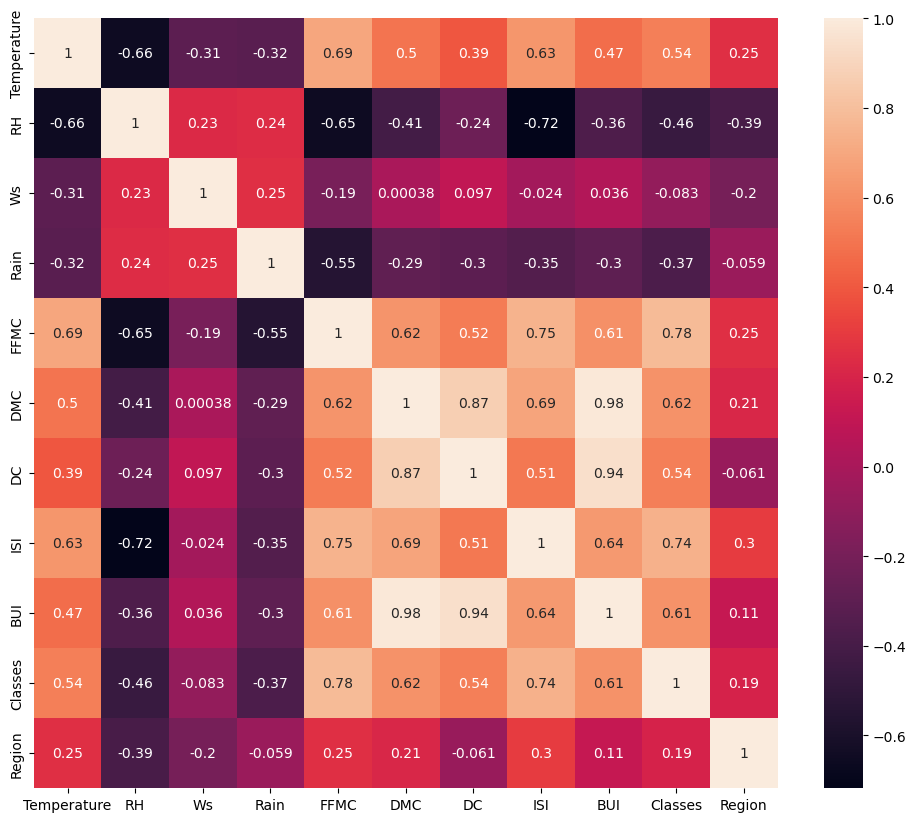

In [35]:
# multicorllinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [36]:
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [37]:
corr_features = correlation(X_train, 0.9)   # set up by domain expertise

In [38]:
# drop features when correlation more than 0.85
X_train.drop(corr_features, axis = 1, inplace=True)
X_test.drop(corr_features, axis = 1, inplace=True)

#### Feature Scaling and Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.transform(X_test)

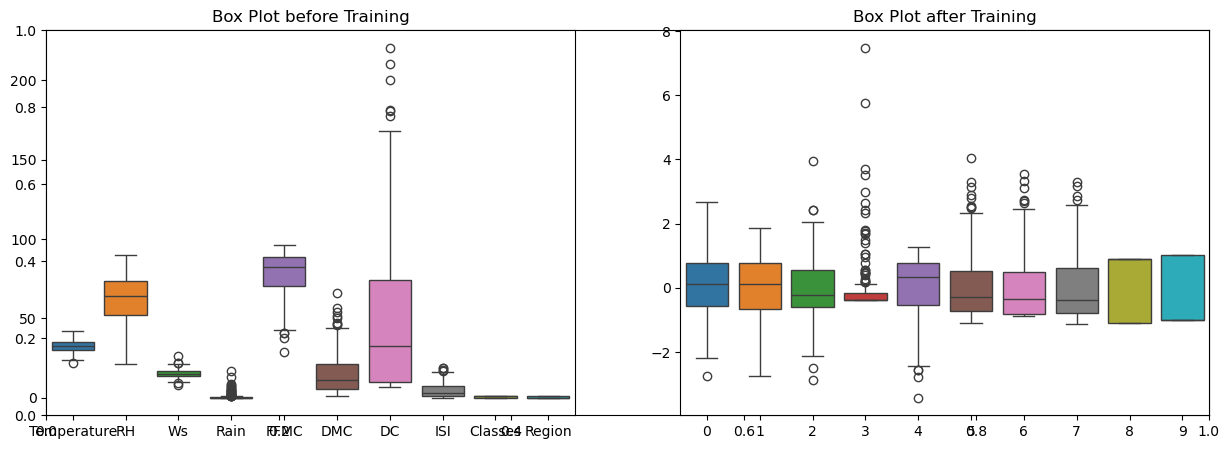

In [40]:
# Box plot to understand effect of Standard Scaler
plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(X_train)
plt.title("Box Plot before Training")
plt.subplot(1, 2, 2)
sns.boxplot(X_train_scaled)
plt.title("Box Plot after Training")
plt.show()

#### Linear Regression

MAE : 0.5170107980662412
R2 : 0.9830565611009445


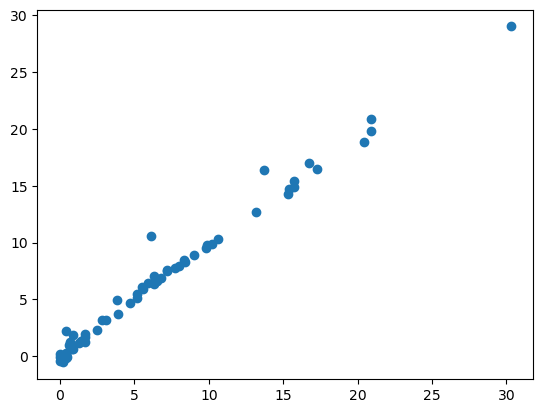

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_sclaed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae}")
print(f"R2 : {r2}")
plt.scatter(y_test, y_pred)

#### Lasso Regression

MAE : 1.1257992990774723
R2 : 0.9498931628519822


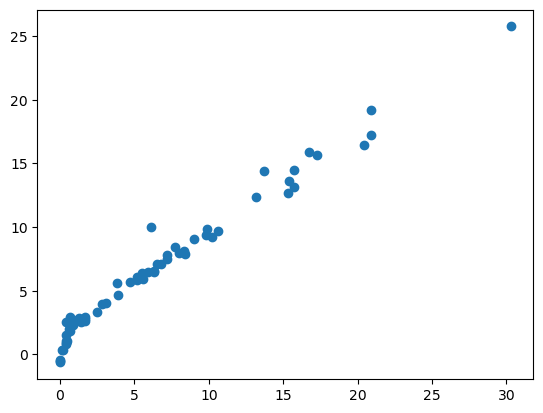

In [44]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_sclaed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae}")
print(f"R2 : {r2}")
plt.scatter(y_test, y_pred)

In [47]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [48]:
lasso_cv.alpha_

0.05725391318234411

In [49]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

MAE : 0.5537550153494094
R2 : 0.9812242879221943


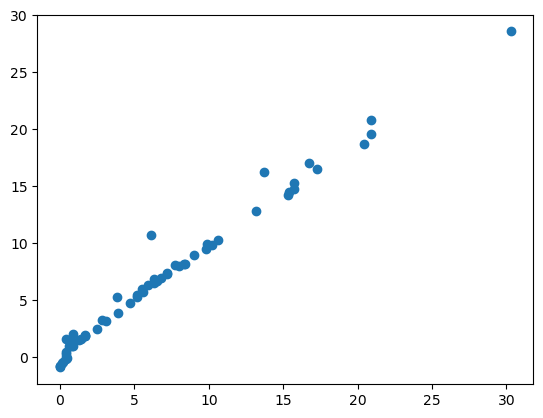

In [50]:
y_pred = lasso_cv.predict(X_test_sclaed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae}")
print(f"R2 : {r2}")
plt.scatter(y_test, y_pred)

#### Ridge Regression

MAE : 0.5292519766274818
R2 : 0.9824051915524251


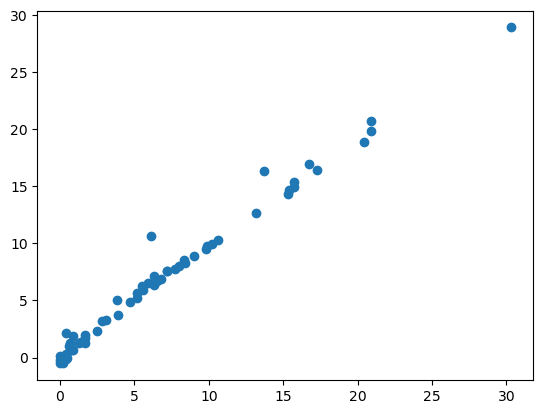

In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_sclaed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae}")
print(f"R2 : {r2}")
plt.scatter(y_test, y_pred)

In [54]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv = 5)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(cv=5)

MAE : 0.5292519766274818
R2 : 0.9824051915524251


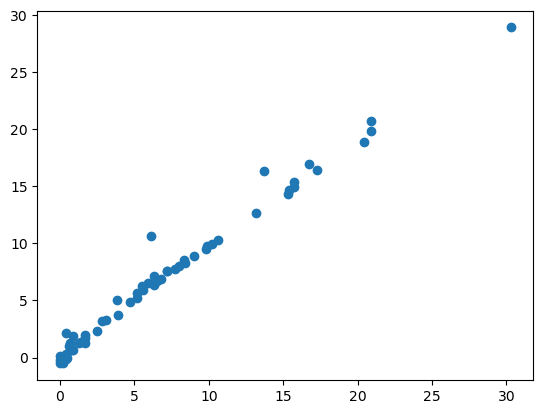

In [55]:
ridge_cv.fit(X_train_scaled, y_train)

y_pred = ridge_cv.predict(X_test_sclaed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae}")
print(f"R2 : {r2}")
plt.scatter(y_test, y_pred)

#### Elasticnet Regression

MAE : 1.7704255521425287
R2 : 0.8887824924177792


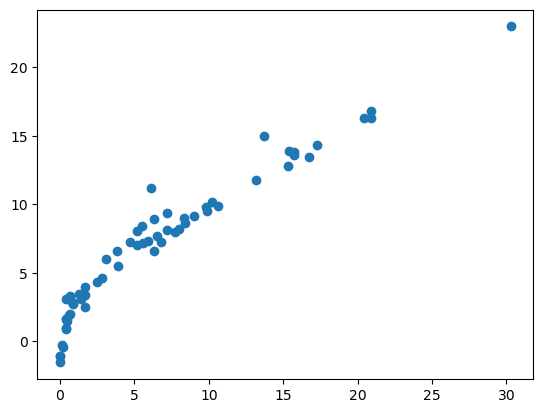

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_sclaed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae}")
print(f"R2 : {r2}")
plt.scatter(y_test, y_pred)

In [53]:
from sklearn.linear_model import ElasticNetCV

elastic_net_cv = ElasticNetCV(cv = 5)
elastic_net_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

MAE : 0.5537550153494094
R2 : 0.9812242879221943


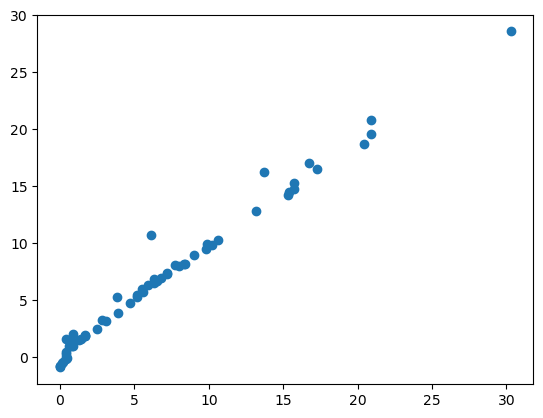

In [56]:
elastic_net_cv.fit(X_train_scaled, y_train)

y_pred = elastic_net_cv.predict(X_test_sclaed)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae}")
print(f"R2 : {r2}")
plt.scatter(y_test, y_pred)